In [2]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import microhapdb
import numpy
import pandas
import seaborn

In [3]:
m = microhapdb.markers.copy()
f = pandas.read_csv('marker-fst.tsv', sep='\t')
m_prime = m[~pandas.isna(m.AvgAe)].join(f.set_index('Marker'), on='Name')
m_prime.head()

,Name,PermID,Reference,Chrom,Offsets,AvgAe,In,Source,AvgFst
0,mh01KK-172,MHDBM-d5a744a2,GRCh38,chr1,"1551453,1551522,1551678",2.9310,0.2160,ALFRED,-0.0441
1,mh01USC-1pA,MHDBM-b44cecf4,GRCh38,chr1,"1594569,1594598,1594613,1594617",3.8005,0.2029,10.1016/j.fsigen.2019.102213,0.0036
2,mh01KK-001,MHDBM-a9f4dcdb,GRCh38,chr1,"3826567,3826754,3826785,3826826",3.1421,0.2860,ALFRED,0.0713
3,mh01KK-106,MHDBM-af04b293,GRCh38,chr1,"4167403,4167500,4167563,4167573",2.6379,0.1962,ALFRED,0.1783
4,mh01KK-070,MHDBM-880ee42f,GRCh38,chr1,"11794399,11794418",1.9123,0.1409,ALFRED,0.1178


In [4]:
sources = m.Source.unique()
labels = {
    'ALFRED':                         'ALFRED (2018)',
    '10.1016/j.fsigen.2019.02.018':   'Chen (2019)',
    '10.1016/j.legalmed.2015.06.003': 'Hiroaki (2015)',
    '10.1016/j.fsigen.2019.102213':   'USC (2020)',
    'ISFG2019:P597':                  'ISFG P597 (2019)',
    '10.1016/j.fsigen.2018.05.008':   'van der Gaag (2018)',
    '10.1016/j.fsigen.2018.05.001':   'Voskoboinik (2018)'
}
colors = [
    '#9b59b6',
    '#3498db',
    '#95a5a6',
    '#e74c3c',
    '#34495e',
    '#2ecc71',
    '#feb308',
]
subsets = [m_prime[m_prime.Source == src] for src in sources]

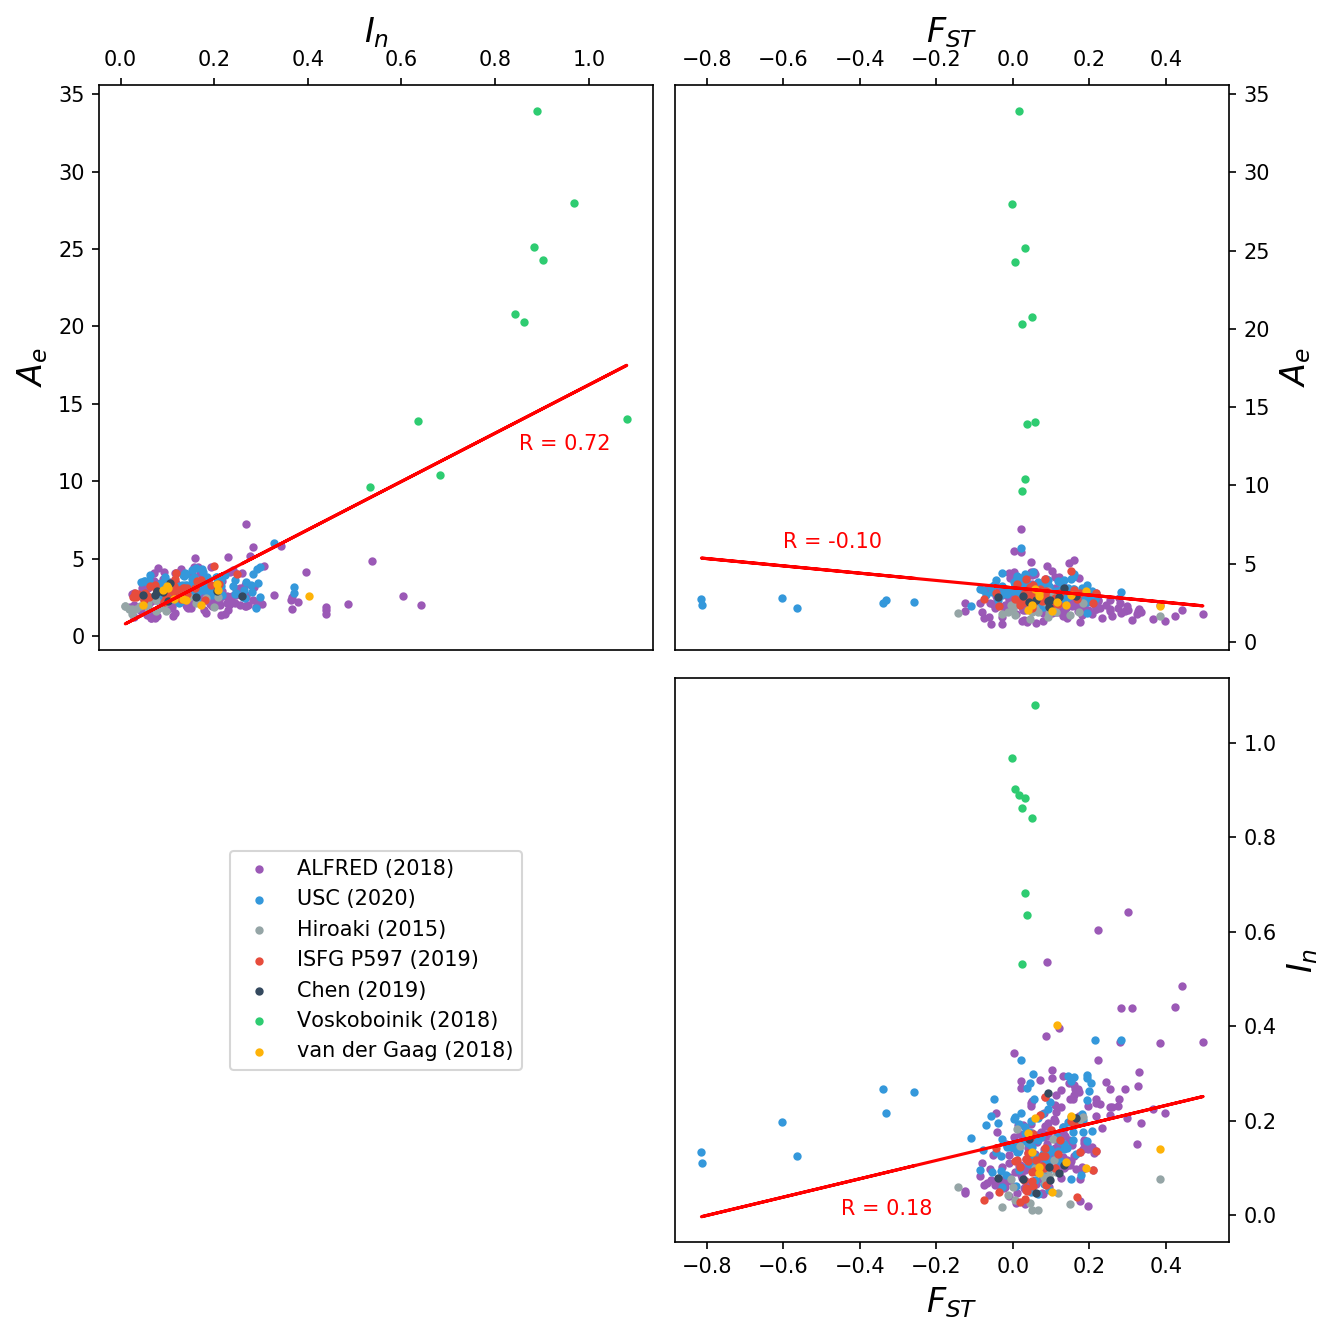

In [20]:
matplotlib.rcParams['axes.labelsize'] = 16
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9), dpi=150, sharex='col', sharey='row')
fig.patch.set_facecolor('white')
#fig.title('Correlation Matrix: $A_E$, $I_n$, and $F_{ST}$', size=18)

axis = plt.subplot(2, 2, 1)
for ss, color, src in zip(subsets, colors, sources):
    axis.scatter(ss.In, ss.AvgAe, color=color, marker='.', label=labels[src])
m, b = numpy.polyfit(m_prime.In, m_prime.AvgAe, 1)
r = numpy.corrcoef(m_prime.In, m_prime.AvgAe)
_ = axis.plot(m_prime.In, m*m_prime.In + b, color='red', linestyle='-')
_ = axis.set_xlabel('$I_n$')
axis.xaxis.tick_top()
axis.xaxis.set_label_position('top')
_ = axis.set_ylabel('$A_e$')
#_ = axis.legend(loc='upper left')
axis.text(0.85, 12, f'R = {r[0, 1]:.2f}', color='red')

plots = list()
axis = plt.subplot(2, 2, 2)
for ss, color, src in zip(subsets, colors, sources):
    sp = axis.scatter(ss.AvgFst, ss.AvgAe, color=color, marker='.', label=labels[src])
    plots.append(sp)
m, b = numpy.polyfit(m_prime.AvgFst, m_prime.AvgAe, 1)
r = numpy.corrcoef(m_prime.AvgFst, m_prime.AvgAe)
_ = axis.plot(m_prime.AvgFst, m*m_prime.AvgFst + b, color='red', linestyle='-')
_ = axis.set_xlabel('$F_{ST}$')
axis.xaxis.tick_top()
axis.xaxis.set_label_position('top')
_ = axis.set_ylabel('$A_e$')
axis.yaxis.tick_right()
axis.yaxis.set_label_position('right')
axis.text(-0.6, 6, f'R = {r[0, 1]:.2f}', color='red')
prev = axis

axis = plt.subplot(2, 2, 3)
axis.axis('off')
_ = axis.legend(*prev.get_legend_handles_labels(), loc='center')
#axis.set_xticks([])
#axis.set_yticks([])

axis = plt.subplot(2, 2, 4)
for ss, color, src in zip(subsets, colors, sources):
    axis.scatter(ss.AvgFst, ss.In, color=color, marker='.', label=labels[src])
m, b = numpy.polyfit(m_prime.AvgFst, m_prime.In, 1)
r = numpy.corrcoef(m_prime.AvgFst, m_prime.In)
_ = axis.plot(m_prime.AvgFst, m*m_prime.AvgFst + b, color='red', linestyle='-')
_ = axis.set_xlabel('$I_n$')
_ = axis.set_xlabel('$F_{ST}$')
_ = axis.set_ylabel('$I_n$')
axis.yaxis.tick_right()
axis.yaxis.set_label_position('right')
axis.text(-0.45, 0, f'R = {r[0, 1]:.2f}', color='red')


plt.tight_layout()

fig.savefig('microhaps-ae-in-fst.pdf')

In [13]:
m_prime.to_csv('markers-with-fst.tsv', sep='\t', index=False)

In [6]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA sequen

(0, 10)

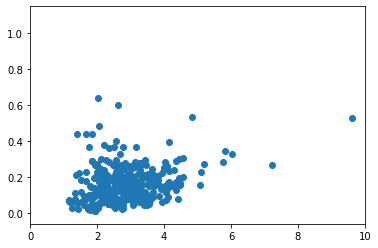

In [7]:
plt.scatter(m_prime.AvgAe, m_prime.In)
plt.xlim((0, 10))

(-0.2, 0.6)

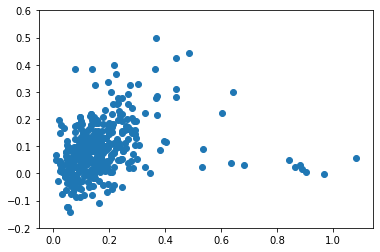

In [8]:
plt.scatter(m_prime.In, m_prime.AvgFst)
plt.ylim((-0.2, 0.6))

(0, 10)

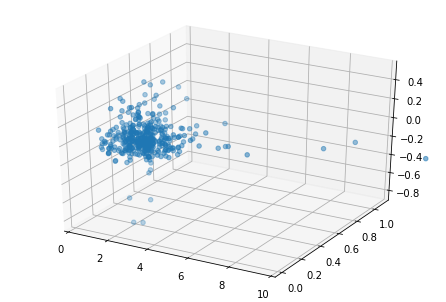

In [9]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(m_prime.AvgAe, m_prime.In, m_prime.AvgFst)
ax.set_xlim((0, 10))